In [36]:
import sys, importlib, os
if ".." not in sys.path: sys.path.append("..")
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
from common import cosmology, constraints, rh_neutrino, util
import model
model = importlib.reload(model)

In [33]:
a_matrix = np.array([[1, 0.001], [1, 1]]) 
Lambdas = np.array([1e5, 1e4])

In [41]:
N = len(Lambdas)
M = np.array([[sum(Lambdas[i]**4 * a_matrix[i, k] * a_matrix[i, l] for i in range(N))
  for l in range(N)] for k in range(N)])

In [47]:
a, b, c = M[0,0], M[1,1], M[0,1]
p = - (a + b)
q = a*b - c**2
m1 = -p/2 + np.sqrt((p / 2)**2 - q)
m2 = -p/2 - np.sqrt((p / 2)**2 - q)
m1, m2

(1.000101209999746e+20, 9979000025407488.0)

array([1.00010121e+20+0.j, 9.97900003e+15+0.j])

In [30]:
Gamma_phi = 1e8
H_inf = 1e12
theta0_1 = 1.0 # np.pi - 0.01
theta0_2 = 1.0
sol = model.simulate(Gamma_phi, H_inf, *Lambdas, *a_matrix, 
                           theta0_1=theta0_1, theta0_2=theta0_2, end=1e-6) 

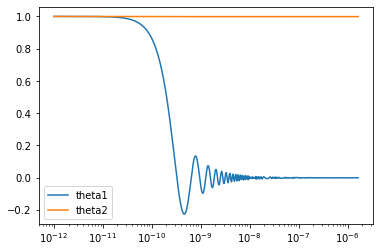

In [31]:
plt.semilogx(sol.t, np.fmod(sol.theta1, 2*np.pi), label="theta1")
plt.semilogx(sol.t, np.fmod(sol.theta2, 2*np.pi), label="theta2")
plt.legend()

Text(0, 0.5, 'eta_B proj.')

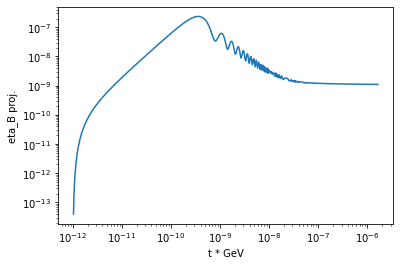

In [32]:
plt.loglog(sol.t, cosmology.n_L_to_eta_B_final(sol.T, sol.n_L))
plt.xlabel("t * GeV")
plt.ylabel("eta_B proj.")